In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-30 / Aki Taanila


Olen käyttänyt Excelin grafiikan perusasioiden opetuksessa työkirjaa https://taanila.fi/kaavio.xlsx. Toistan tässä työkirjan esimerkit vertailun vuoksi Pythonin **matplotlib**-paketilla..

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

## Osa 1 - laadukkaista taulukoista laadukkaita kaavioita

In [3]:
# luon dataframen
df1 = pd.DataFrame({'Etelä':[120, 130, 167, 210],
                    'Keski':[98, 102, 120, 180],
                    'Pohjoinen':[89, 95, 108, 120]},
                    index = ['1. nelj.', '2. nelj.', '3. nelj.', '4. nelj.'])
df1

,Etelä,Keski,Pohjoinen
1. nelj.,120,98,89
2. nelj.,130,102,95
3. nelj.,167,120,108
4. nelj.,210,180,120


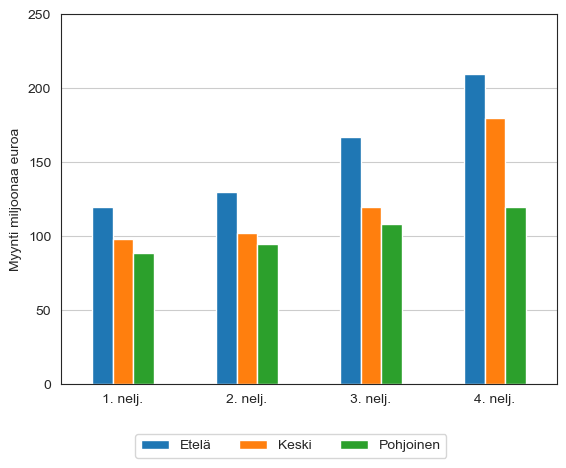

In [4]:
df1.plot(kind='bar', rot=0)    # rot kääntää luokka-akselin nimiöt.

plt.yticks([0, 50, 100, 150, 200, 250])    # Arvoakselin asteikon arvot.
plt.ylabel('Myynti miljoonaa euroa')    # Arvoakselin otsikko.
plt.grid(axis='y')    # Vaakasuuntainen taustaviivoitus.
plt.legend(loc=(0.15, -0.2), ncol=3)    # Selitteen sijoittelu ja leveys (3 vierekkäin).

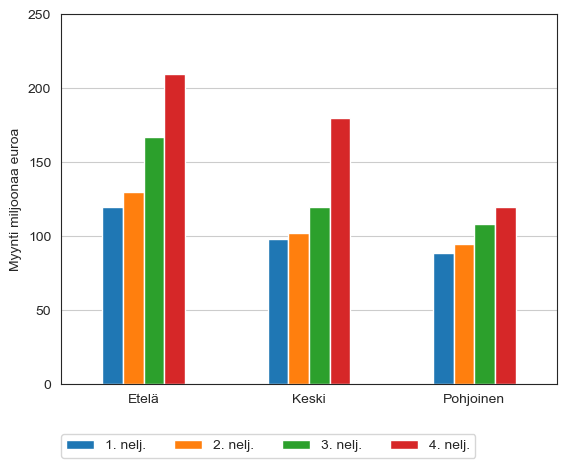

In [5]:
df1.T.plot(kind='bar', rot=0)    # Äskeinen arvosarjat ja luokat vaihdettuina päittäin.

plt.yticks([0, 50, 100, 150, 200, 250])
plt.ylabel('Myynti miljoonaa euroa')
plt.grid(axis='y')
plt.legend(loc=(0, -0.2), ncol=4)

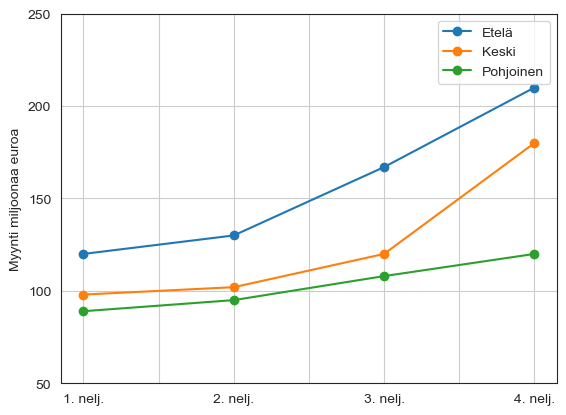

In [6]:
# Pylväskaavion sijasta voin käyttää myös viivakaaviota.
# style määrittää viivan ja havaintopisteen tyylin.
df1.plot(style='-o')

plt.yticks([50, 100, 150, 200, 250])
plt.ylabel('Myynti miljoonaa euroa')
plt.grid()

## Osa 2 - vaakapylväskaavio

In [7]:
df2 = pd.DataFrame({'Kotieläimet 1000 kpl': [4056, 1483, 915, 195, 122, 59]},
                    index = ['Siipikarjaa', 'Sikoja', 'Nautakarjaa', 'Poroja', 'Lampaita', 'Hevosia'])
df2

,Kotieläimet 1000 kpl
Siipikarjaa,4056
Sikoja,1483
Nautakarjaa,915
Poroja,195
Lampaita,122
Hevosia,59


[Text(2, 0, '4056'),
 Text(2, 0, '1483'),
 Text(2, 0, '915'),
 Text(2, 0, '195'),
 Text(2, 0, '122'),
 Text(2, 0, '59')]

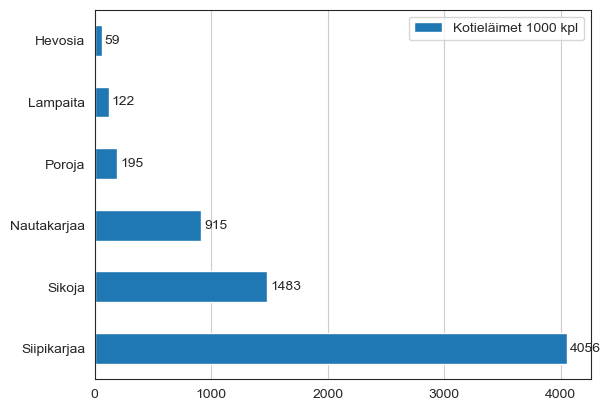

In [8]:
ax = df2.plot(kind='barh')

plt.xticks([0, 1000, 2000, 3000, 4000])
plt.grid(axis='x')
plt.bar_label(ax.containers[0], padding=2)   # Lukuarvot pylväiden viereen.

## Osa 3 - histogrammi

In [9]:
df3 = pd.DataFrame({'Henkilöä': [5, 19, 25, 20, 8, 5]},
                    index = ['0-1600', '1601-2100', '2101-2600', '2601-3100', '3101-3600', '3601-'])
df3

,Henkilöä
0-1600,5
1601-2100,19
2101-2600,25
2601-3100,20
3101-3600,8
3601-,5


[Text(0, 2, '5'),
 Text(0, 2, '19'),
 Text(0, 2, '25'),
 Text(0, 2, '20'),
 Text(0, 2, '8'),
 Text(0, 2, '5')]

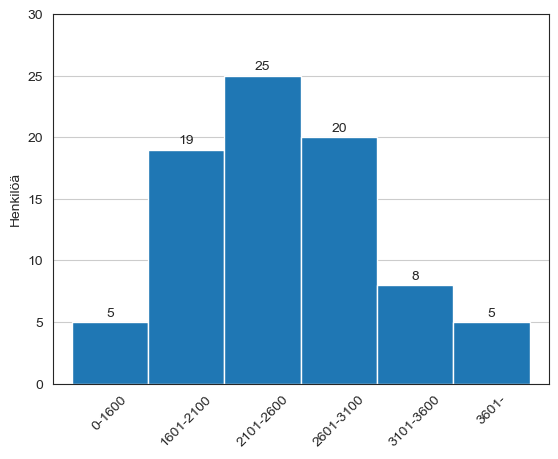

In [10]:
# width=1: pylväät kiinni toisissaan.
ax = df3.plot(kind='bar', legend=False, edgecolor='white', width=1, rot=45)

plt.ylabel('Henkilöä')
plt.ylim(0, 30)
plt.grid(axis='y')
ax.bar_label(ax.containers[0], padding=2)

## Osa 4 - mielipiteiden keskiarvoja pylväinä 

In [11]:
df4 = pd.DataFrame([2.8, 3.9, 4.7],
                    index = ['Hintataso', 'Valikoiman laajuus', 'Henkilökunnan palvelualttius'],
                    columns = ['Tyytyväisyyskeskiarvo'])
df4

,Tyytyväisyyskeskiarvo
Hintataso,2.8
Valikoiman laajuus,3.9
Henkilökunnan palvelualttius,4.7


[Text(2, 0, '2.8'), Text(2, 0, '3.9'), Text(2, 0, '4.7')]

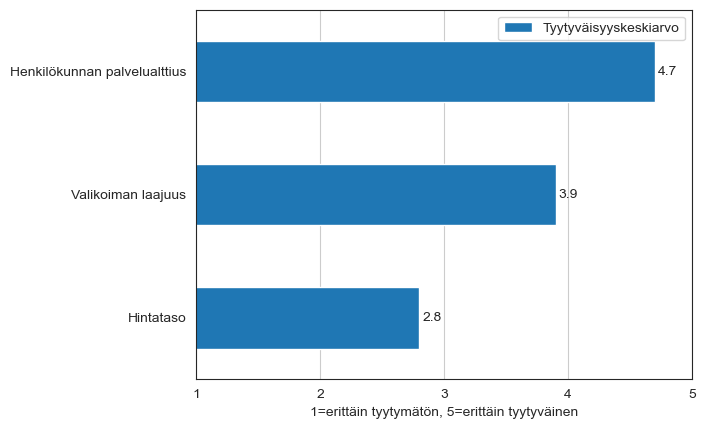

In [12]:
ax = df4.plot(kind='barh')

plt.xlim(1, 5)
plt.xlabel('1=erittäin tyytymätön, 5=erittäin tyytyväinen')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis = 'x')

# Lukuarvot pylväiden viereen.
ax.bar_label(ax.containers[0], padding=2)

## Osa 5 - useita arvosarjoja

In [13]:
df5a = pd.DataFrame({'Mies': [17, 15, 6],
                     'Nainen': [8, 15, 21]},
                     index = ['Tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 'Tyytyväinen'])
df5a

,Mies,Nainen
Tyytymätön,17,8
Ei tyytymätön eikä tyytyväinen,15,15
Tyytyväinen,6,21


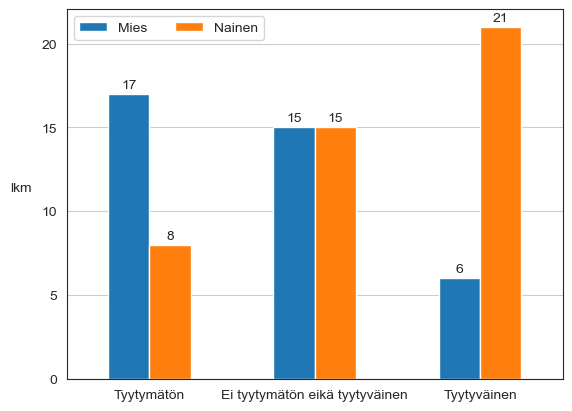

In [14]:
ax = df5a.plot(kind='bar', rot=0)

plt.yticks([0, 5, 10, 15, 20])
# Arvoakselin otsikko vaakasuuntaisena, labelpad määrittää etäisyyden y-akselista.
plt.ylabel('lkm', rotation=0, labelpad=15)
plt.legend(ncol=2)
plt.grid(axis='y')
for container in ax.containers:
    ax.bar_label(container, padding=2)

In [15]:
# Prosentti-taulukko.
df5b = df5a.copy()
df5b['Mies'] = df5a['Mies'] / df5a['Mies'].sum()
df5b['Nainen'] = df5a['Nainen'] / df5a['Nainen'].sum()
df5b

,Mies,Nainen
Tyytymätön,0.447368,0.181818
Ei tyytymätön eikä tyytyväinen,0.394737,0.340909
Tyytyväinen,0.157895,0.477273


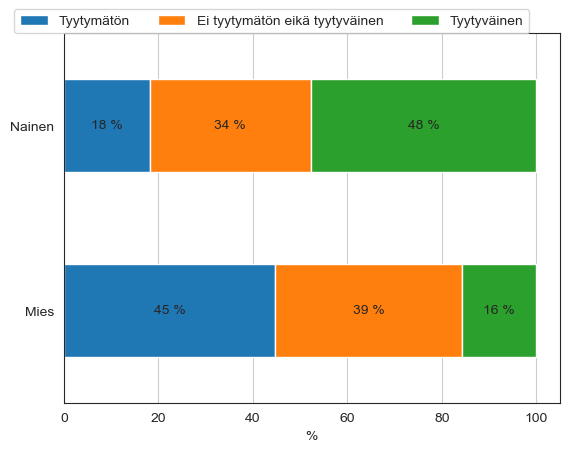

In [16]:
# T vaihtaa dataframen rivit ja sarakkeet päittäin.
# stacked=True: pinottu pylväskaavio.
ax = (df5b * 100).T.plot(kind='barh', stacked=True)

plt.xlabel('%')
plt.grid(axis='x')
plt.legend(loc=(-0.10, 1), ncol=3)

# Lukuarvojen lisääminen on tähän kaaviolajiin hieman konstikasta.
for bar in ax.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if width>0:
        label = '{:.0f} %'.format(width)
        plt.text(x=left+width/2, y=bottom+height/2, s=label, ha='center', va='center')

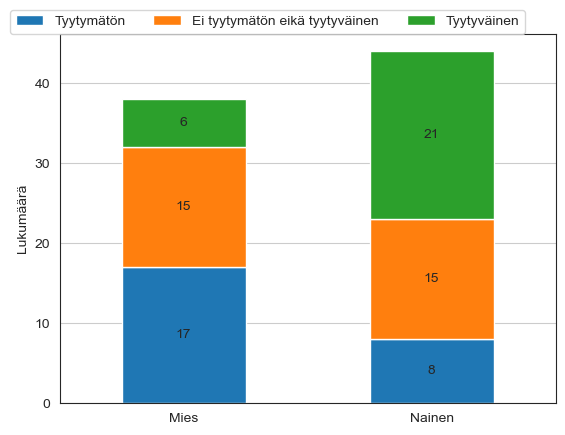

In [17]:
ax = df5a.T.plot(kind='bar', stacked=True, rot=0)

plt.ylabel('Lukumäärä')
plt.grid(axis='y')
plt.legend(loc=(-0.1, 1), ncol=3)
for bar in ax.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if height>0:
        label = '{:.0f}'.format(height)
        plt.text(x=left+width/2, y=bottom+height/2, s=label, ha='center', va='center')

## Osa 6 - kahden arvoakselin kaavio

Jos esitettävät arvosarjat ovat eri suuruusluokkaa, niin kahden arvoakselin käyttö on paikallaan.

In [18]:
# Luon dataframen Helsingin pörssin kehityksestä vuosina 1980 - 1990
df6 = pd.DataFrame({'Indeksi':[85,83,116,144,193,184,254,320,405,442,284],
                    'Myynti':[307954,566829,1241391,2109871,3009299,9184649,24933405,29726136,31719819,15343617,6318198]},
                   index=['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990'])
df6

,Indeksi,Myynti
1980,85,307954
1981,83,566829
1982,116,1241391
1983,144,2109871
1984,193,3009299
1985,184,9184649
1986,254,24933405
1987,320,29726136
1988,405,31719819
1989,442,15343617


<Axes: ylabel='Myynti miljoonaa euroa'>

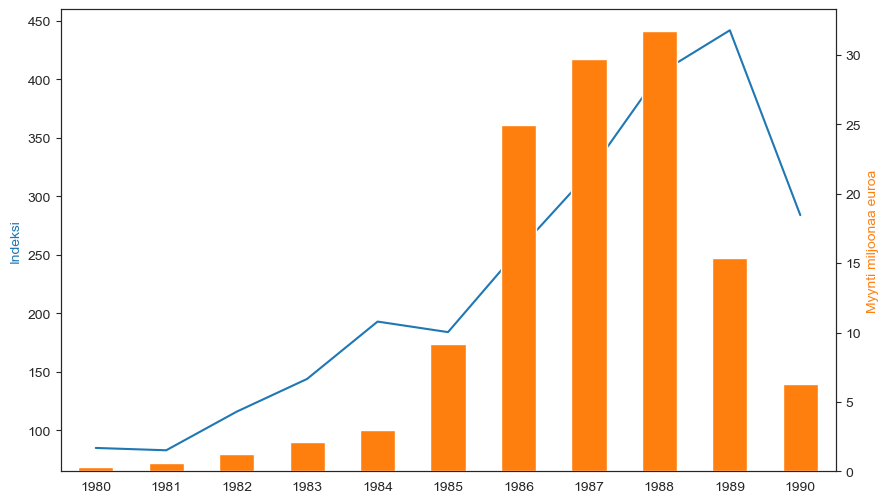

In [19]:
# Indeksi viivakaaviona.
df6['Indeksi'].plot(color='C0', figsize=(10, 6))

# Indeksille ja sen akselille käytössä olevien värien ensimmäinen väri 'C0'.
plt.ylabel('Indeksi', color='C0')

# Toinen kaavio, jolla on oma arvoakseli, mutta yhteinen x-akseli indeksin kanssa.
plt.twinx()

# Myynnille ja sen akselille käytössä olevien värien toinen väri 'C1'.
plt.ylabel('Myynti miljoonaa euroa', color='C1')

# Myynti pylväinä.
(df6['Myynti'] / 1000000).plot(kind='bar', color='C1')

## Osa 7 - pylväskaavioita

Excelissä tämä osa oli esimerkkinä pylväskaavioihin liittyvistä Excel-ongelmista. Täällä vastaavaa ongelmaa ei esiinny.

In [20]:
df7 = pd.DataFrame({'2008':[250,350,100,140],
                    '2009':[260,300,200,120],
                    '2010':[270,310,240,140]},
                   index=['I','II','III','IV'])
df7

,2008,2009,2010
I,250,260,270
II,350,300,310
III,100,200,240
IV,140,120,140


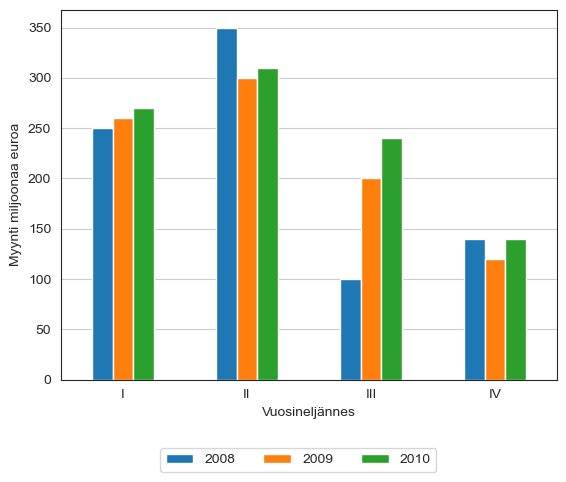

In [21]:
df7.plot(kind='bar', rot=0)

plt.xlabel('Vuosineljännes')
plt.ylabel('Myynti miljoonaa euroa')
plt.grid(axis='y')
plt.legend(loc=(0.2, -0.25), ncol=3)

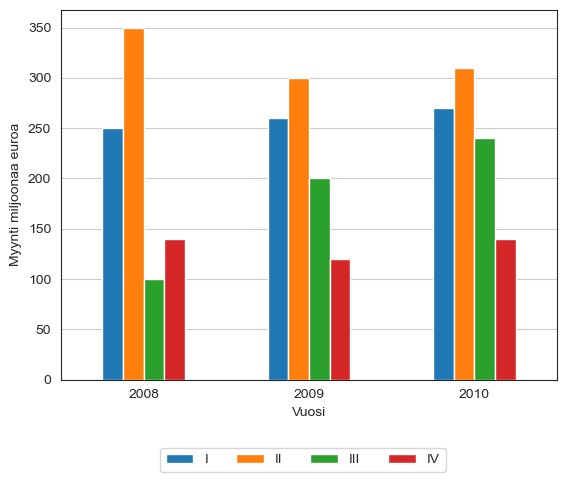

In [22]:
df7.T.plot(kind='bar', rot=0)    # T vaihtaa arvosarjat ja luokat päittäin.

plt.xlabel('Vuosi')
plt.ylabel('Myynti miljoonaa euroa')
plt.grid(axis='y')
plt.legend(loc=(0.2, -0.25), ncol=4)

## Osa 8 - ympyräkaavio

In [23]:
df8 = pd.DataFrame([0.2591,0.2292,0.14446,0.0570,0.0519,0.2582],
                   index=['Nordea','OP','Sampo','SEB Gyllenberg','Evli','Muut'],
                   columns=['%'])
df8

,%
Nordea,0.25910
OP,0.22920
Sampo,0.14446
SEB Gyllenberg,0.05700
Evli,0.05190
Muut,0.25820


Text(0, 0.5, '')

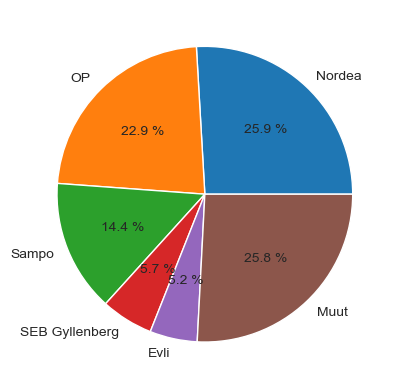

In [24]:
# autopct muotoilee prosenttiluvut, muotoilukoodit hieman hankalia.
df8['%'].plot(kind='pie', autopct='%1.1f %%')

plt.ylabel('')

## Osa 9 - aikasarjojen vertailu

In [25]:
df9 = pd.DataFrame({'Etelä':[120,130,167,210,130,135,172,213,134],
                    'Keski':[98,102,120,180,103,109,140,189,104],
                    'Pohjoinen':[89,95,108,120,88,99,110,123,88]},
                   index=['1.2009','2.2009','3.2009','4.2009','1.2010','2.2010','3.2010','4.2010','1.2011'])
df9

,Etelä,Keski,Pohjoinen
1.2009,120,98,89
2.2009,130,102,95
3.2009,167,120,108
4.2009,210,180,120
1.2010,130,103,88
2.2010,135,109,99
3.2010,172,140,110
4.2010,213,189,123
1.2011,134,104,88


Tässä vaihdan tyylimäärittelyksi **'seaborn-whitegrid'**, jossa taustaviivoitukset ovat valmiina.

Huomaa, miten indeksin arvot tulevat automaattisesti kaavion vaaka-akselille.

**style**-parametri määrittää viivan ja havaintopisteiden tyylin. Lisätietoa: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html.

<Axes: >

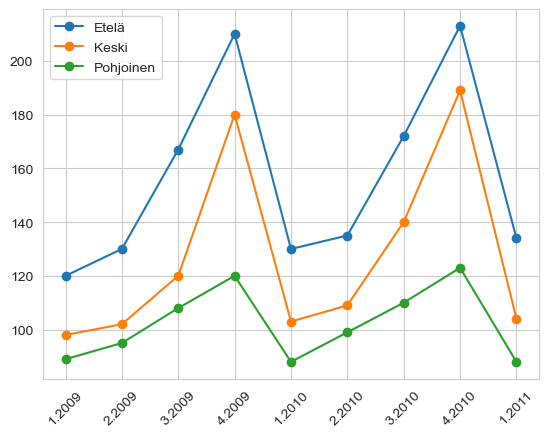

In [26]:
sns.set_style('whitegrid')

df9.plot(style='-o', rot=45)

<Axes: >

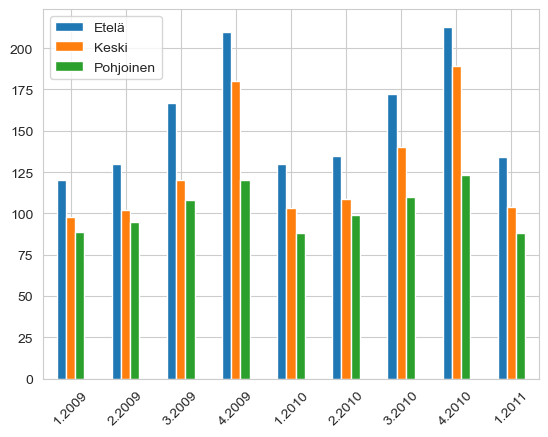

In [27]:
df9.plot(kind='bar', rot=45)    # Edellinen kaavio pylväinä.

Pylväskaavio ei ole havainnollinen aikasarjojen vertailussa (vertaa viivakaavioon)!

## Osa 10 - viivakaavio ja hajontakaavio

Pandas-kirjaston **to_datetime**-funktio osaa muuntaa eri tavoin esitettyjä aikatietoja oikeiksi aikaleimoiksi.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html.

In [28]:
df10a = pd.DataFrame({'Kysyntä':[5, 9, 8, 10, 11]})
df10a.index = pd.to_datetime(['6.3.2011', '7.3.2011', '8.3.2011', '9.3.2011', '10.3.2011'])
df10a

,Kysyntä
2011-06-03,5
2011-07-03,9
2011-08-03,8
2011-09-03,10
2011-10-03,11


<Axes: >

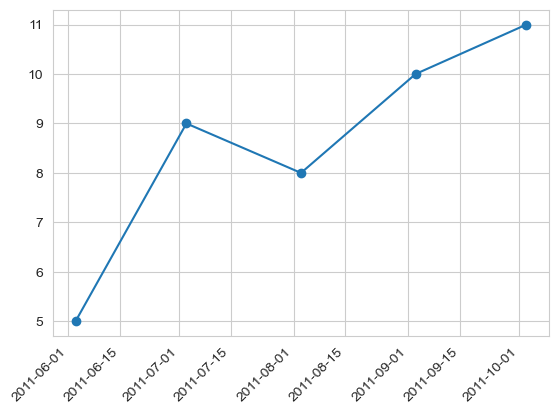

In [29]:
df10a['Kysyntä'].plot(style='-o', rot=45)

In [30]:
df10b = pd.DataFrame({'Joukkoliikenne':[12.5, 13.3, 13.1, 12.9, 12.8, 12.8, 12.9, 13.0, 13.1, 13.3, 13.6, 13.2],
                      'Henkilöauto':[34.8, 51.2, 55.7, 57.0, 58.3, 59.6, 60.9, 61.9, 62.5, 63.8, 63.4, 64.3]})
df10b.index = pd.to_datetime(['1980','1990','2000','2001','2002','2003','2004',
                              '2005','2006','2007','2008','2009'], format='%Y')
df10b

,Joukkoliikenne,Henkilöauto
1980-01-01,12.5,34.8
1990-01-01,13.3,51.2
2000-01-01,13.1,55.7
2001-01-01,12.9,57.0
2002-01-01,12.8,58.3
2003-01-01,12.8,59.6
2004-01-01,12.9,60.9
2005-01-01,13.0,61.9
2006-01-01,13.1,62.5
2007-01-01,13.3,63.8


Huomaa, että alkupäässä havaintojen väli on eri mittainen kuin loppupäässä.

(0.0, 70.0)

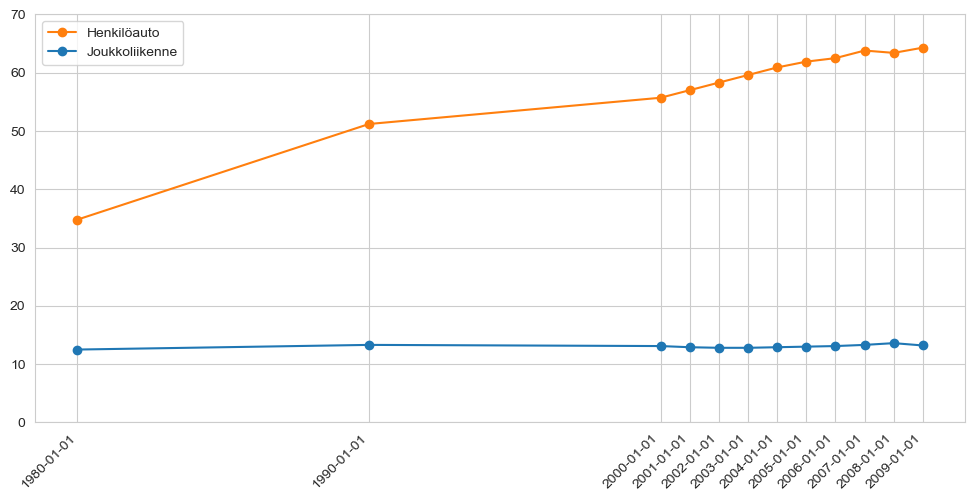

In [31]:
df10b.plot(style='-o', legend='reverse', rot=45, figsize=(12, 6))

plt.xticks(df10b.index)
plt.ylim(0, 70)

In [32]:
df10c = pd.DataFrame({'Markkinointi (10000 euroa)':[72.9, 77.3, 78.0, 82.9, 89.5, 96.3, 
                                                    99.1, 102.3, 105.0, 103.9, 111.7, 126.3],
                      'Liikevaihto (miljoonaa euroa)':[23.2, 29.2, 35.4, 34.7, 39.8, 45.6,
                                                       50.2, 55.0, 53.8, 56.7, 58.9, 64.4]})
df10c

,Markkinointi (10000 euroa),Liikevaihto (miljoonaa euroa)
0,72.9,23.2
1,77.3,29.2
2,78.0,35.4
3,82.9,34.7
4,89.5,39.8
5,96.3,45.6
6,99.1,50.2
7,102.3,55.0
8,105.0,53.8
9,103.9,56.7


<Axes: xlabel='Markkinointi (10000 euroa)', ylabel='Liikevaihto (miljoonaa euroa)'>

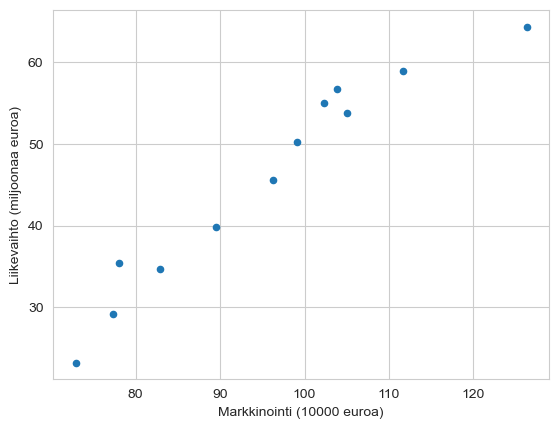

In [33]:
df10c.plot(x='Markkinointi (10000 euroa)', y='Liikevaihto (miljoonaa euroa)', kind='scatter')    # Hajontakaavio.

## Lisätietoa 

https://tilastoapu.wordpress.com/python